In [1]:
from Bern2D import *
import numpy as np

In [148]:
staterange = slice(31,71)
thetas = (1.0, 0.75, 0.55)
foos = [Bernoulli2Diffusion(theta=t, cost=-.001, sigma=(0.6,0.6)) for t in thetas]
x = np.arange(-foos[0].state_range - .5, foos[0].state_range + 1)[staterange]
zs = [np.ma.masked_array(foo.v, mask=foo.get_sample_region())[staterange, staterange] for foo in foos]

Finished after 154 iterations.
Finished after 139 iterations.
Finished after 91 iterations.


In [149]:
thetas_rt = np.linspace(1.0,0.5,11)
moarfoos = [Bernoulli2Diffusion(theta=t, cost=-.001, sigma=(0.6,0.6)) for t in thetas_rt]
rt_con = np.array([foo.performance((True, True))[0] for foo in moarfoos])
rt_inc = np.array([foo.performance((True, False))[0] for foo in moarfoos])

Finished after 154 iterations.
Finished after 150 iterations.
Finished after 148 iterations.
Finished after 146 iterations.
Finished after 142 iterations.
Finished after 139 iterations.
Finished after 133 iterations.
Finished after 125 iterations.
Finished after 114 iterations.
Finished after 91 iterations.
Finished after 69 iterations.


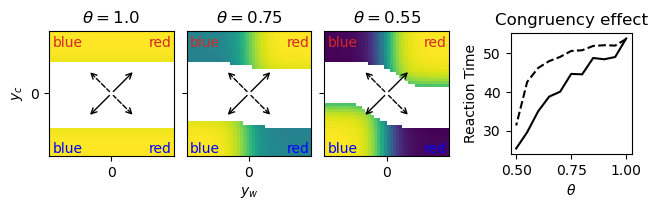

In [163]:
bigfig = plt.figure(layout='constrained')
fig_region, fig_rt = bigfig.subfigures(1, 2, width_ratios=(2.4, 1))

zmin = min([np.min(z) for z in zs])
zmax = max([np.max(z) for z in zs])
axs = fig_region.subplots(1, len(foos), sharey=True)
for ax, z, t in zip(axs, zs, thetas):
    ax.pcolormesh(x, x, z, vmin=zmin, vmax=zmax)
    ax.annotate('', (0,0), (7.5,7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple'
    ax.annotate('', (0,0), (-7.5,-7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple', 
    ax.annotate('', (0,0), (-7.5,7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange
    ax.annotate('', (0,0), (7.5,-7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange'
    ax.annotate('blue',(-19,-19),color='blue')
    ax.annotate('blue',(-19,15),color='tab:red')
    ax.annotate('red',(12,15),color='tab:red')
    ax.annotate('red',(12,-19),color='blue')
    ax.set_title(r'$\theta='+str(t)+'$')
    ax.set_aspect(1)
    ax.set_xticks([0])
    ax.set_yticks([])
axs[0].set_yticks([0])
axs[0].set_ylabel(r'$y_c$')
axs[1].set_xlabel(r'$y_w$')

ax_rt = fig_rt.subplots()
ax_rt.plot(thetas_rt, rt_con, color='black')
ax_rt.plot(thetas_rt, rt_inc, linestyle='--', color='black')
ax_rt.set_aspect(np.diff(ax_rt.get_xlim())[0] / np.diff(ax_rt.get_ylim())[0])
ax_rt.set_xlabel(r'$\theta$')
ax_rt.set_ylabel('Reaction Time')
ax_rt.set_xticks([.5, .75, 1.0])
ax_rt.set_title('Congruency effect')

plt.savefig('fig1.pdf', bbox_inches='tight')